# Introduction: Simple Neural Network with Iris Dataset

Welcome to this Jupyter Notebook, where we'll be diving deep into the fascinating world of neural networks using the renowned **Iris Dataset**. This dataset, often considered the "Hello World" of machine learning, provides a perfect playground to understand the intricacies of neural network modeling. In this analysis, we'll construct a neural network model to classify iris flowers into one of three species based on their sepal and petal measurements.

### Objective:
Our primary goal is to understand the relationships between the sepal and petal measurements of iris flowers and their respective species. By constructing a neural network model, we aim to classify the flowers into their correct species based on these measurements. The model's performance will be assessed using various metrics, ensuring its robustness and accuracy.

$$\Large \displaystyle \hat{y}_i = f(W \cdot x_i + b)$$

 - \$\hat{y}_i \$ is the predicted class label for the \$i^{th} \$ observation.
 - \$ W \$ represents the weight matrix of the neural network.
 - \$ x_i \$ is the feature vector for the \$ i^{th} \$ observation.
 - \$ b \$ is the bias vector of the neural network.
 - \$ f \$ is the activation function used in the neural network.

### Dataset Overview:
The Iris Dataset is a classic dataset in pattern recognition literature. It contains three classes of 50 instances each, where each class refers to a type of iris plant. The dataset has four features which represent the physical dimensions of the flowers.

### Structure of this Notebook:
1. [Installing and Importing Necessary Libraries](#ch1)
2. [Loading the Iris Dataset](#ch2)
3. [Splitting the Data](#ch3)
4. [Data Processing](#ch4)
5. [Constructing and Compiling the Neural Network Model](#ch5)
6. [Training the Neural Network](#ch6)
7. [Model Performance Visualization](#ch7)
8. [Model Evaluation on Test Data](#ch8)
9. [Confusion Matrix](#ch9)
10. [Classification Report](#ch10)
11. [Conclusion](#ch11)

By the end of this notebook, you'll have a comprehensive understanding of how to build, train, and evaluate a neural network model using Python, TensorFlow, and Keras. You'll also gain insights into the importance of data preprocessing and visualization in the machine learning pipeline. Let's dive in and explore the world of neural networks!

## 1. Installing and Importing Necessary Libraries <a id='ch1'></a>

Before starting our analysis, we need to import the necessary Python libraries that will be used throughout this notebook:

- **`pandas`** and **`numpy`**: Foundational libraries for data manipulation, analysis, and numerical operations. They provide data structures for efficiently storing large datasets and tools for reshaping, aggregating, and merging data.

- **`matplotlib` and **`seaborn`**: Essential libraries for data visualization. They offer a wide range of plotting tools and techniques that can enhance the understanding of our data.

- **`IPython.display`**: Provides utilities for displaying objects in Jupyter, enhancing the interactivity and presentation of our notebook.

- **`sklearn.datasets`**: From scikit-learn, this module allows us to fetch datasets, including the Iris dataset, providing a convenient way to load data for our analysis.

- **`sklearn.model_selection`**: This module offers various utilities for model selection, including `train_test_split` for partitioning our data.

- **`sklearn.preprocessing`** and **`sklearn.pipeline`**: Offer common utility functions and transformer classes to change raw feature vectors into a representation more suitable for downstream estimators. We'll use `StandardScaler` to standardize features and `Pipeline` to streamline many of the routine processes.

- **`tensorflow`** and **`keras`**: Libraries for building and training neural networks. They provide a wide range of tools and utilities for deep learning, allowing us to construct, train, and evaluate neural network models.

- **`sklearn.metrics`**: Provides functions for model evaluation, including `classification_report` and `accuracy_score` to measure the performance of our classification model, and `confusion_matrix` to evaluate the accuracy of classification by comparing the actual and predicted classes.

By importing these libraries upfront, we ensure a smooth workflow, allowing us to focus on the core analysis without interruptions.

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown

# Dataset
from sklearn.datasets import load_iris

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Metrics and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 2. Loading the Iris Dataset <a id='ch2'></a>

The **Iris Dataset** is one of the most iconic datasets in the field of machine learning and statistics. Introduced by the British biologist and statistician Ronald Fisher in 1936, it has since become a staple for introductory classification tasks in machine learning.

The dataset consists of **150 samples** from each of three species of Iris flowers (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the lengths and the widths of the sepals and petals.

For our analysis, we'll utilize all of the available features in the dataset to classify the flowers into one of the three species:

- `sepal length (cm)`: The length of the sepal, which is the part of the flower that encases the budding petal.

- `sepal width (cm)`: The width of the sepal.

- `petal length (cm)`: The length of the petal, which is the colorful part of the flower that attracts pollinators.

- `petal width (cm)`: The width of the petal.

These features capture various physical characteristics of the flowers, and they have been found to be discriminative enough to distinguish between the three species of Iris.

To load the dataset, we use the `load_iris` function from scikit-learn. This function provides a convenient way to load the Iris dataset, making it easy to access for machine learning and data analysis.

In [2]:
# Load the Iris dataset
iris = load_iris()

# Convert the dataset to a pandas DataFrame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. Splitting the Data <a id='ch3'></a>

Before training our neural network model, it's crucial to partition the dataset into two subsets: a <span style="color:red">**training set**</span> and a <span style="color:red">**testing set**</span>. This division allows us to train our model on one subset of the data and subsequently evaluate its performance on an independent, unseen subset. Adopting this strategy provides insight into how well our model will likely generalize to new, unseen data.

For this task, we employ the `train_test_split` function from scikit-learn:

- `X_train`, `y_train`: These represent the features and target variable for the training set, respectively. Our model will be trained using this data.

- `X_test`, `y_test`: These denote the features and target variable for the testing set, respectively. This data will be instrumental in assessing the model's performance.

We've allocated 20% of the data for testing purposes (`test_size=0.2`). The `random_state` parameter is set to 1337, ensuring reproducibility in our data splits. This guarantees that each time we execute this code, the same train/test partition is maintained, facilitating consistent results and comparisons.

In [3]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


## 4. Data Processing <a id='ch4'></a>

Data preprocessing is an indispensable step in the machine learning workflow. It entails transforming the raw data to make it suitable for model training. For the **Iris Dataset**, our preprocessing tasks will be streamlined:

1. <span style="color:red">**Standardization**</span>: Neural networks often benefit from having input features that are on a similar scale, with a mean close to 0 and a standard deviation close to 1. This is because features with vastly different scales can result in uneven weight updates, potentially causing the model to converge to a suboptimal solution or even fail to converge at all. 
 - **StandardScaler**: We'll use the `StandardScaler` from scikit-learn to standardize our features. This scaler subtracts the mean and divides by the standard deviation for each feature, ensuring that the transformed feature has a mean of 0 and a standard deviation of 1.


2. <span style="color:red">**Constructing the Preprocessing Pipeline**</span>: To ensure a consistent application of preprocessing steps, we'll employ a `Pipeline`. This tool allows us to define a series of transformations that will be applied in sequence. For our dataset:
 - **Pipeline**: Our pipeline will begin with the standardization step. This ensures that every time we pass data through this pipeline, it undergoes the same sequence of transformations, maintaining consistency and reducing the potential for errors.

By diligently preprocessing our data, we set the stage for the subsequent modeling phase, ensuring that our neural network operates on standardized and well-structured data.

In [4]:
# Create a pipeline for data preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

# Fit the preprocessor to the training data and transform it
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## 5. Constructing and Compiling the Neural Network Model <a id='ch5'></a>

With our data preprocessed and ready, the next pivotal step is to construct our neural network model. Neural networks are a subset of machine learning models inspired by the structure of the human brain. They consist of interconnected nodes (neurons) organized into layers. For our analysis, we'll be using the `Sequential` model from TensorFlow's Keras API, which allows for the linear stacking of layers.

The construction and training of our neural network involve several steps:

- <span style="color:red">**Building the Neural Network Architecture**</span>: Our neural network will comprise three layers:
  - **Input Layer**: This layer will have 10 neurons and use the ReLU (Rectified Linear Unit) activation function. The `input_shape` matches the number of features in our dataset.
  - **Hidden Layer**: Another layer with 10 neurons, also using the ReLU activation function. This layer will learn complex patterns and relationships from the data.
  - **Output Layer**: This layer will have 3 neurons, corresponding to the three classes of the Iris dataset. It uses the softmax activation function, ensuring the output values are probabilities that sum up to 1.

- <span style="color:red">**Compiling the Model**</span>: Once the architecture is defined, we need to compile the model. This step specifies the optimizer, loss function, and metrics for evaluation. We're using:
  - **Optimizer**: Adam, an adaptive learning rate optimization algorithm that's efficient and requires little memory.
  - **Loss Function**: `sparse_categorical_crossentropy`, suitable for multi-class classification problems where labels are integers.
  - **Metrics**: Accuracy, which calculates the proportion of correctly predicted classifications in the dataset.

- <span style="color:red">**Model Summary**</span>: After compiling, we display a summary of our model's architecture, showing the layers, their type, output shape, and the number of parameters.

By meticulously constructing and compiling our neural network, we lay the groundwork for the subsequent training phase, ensuring our model is well-suited to recognize patterns in the Iris dataset.

In [5]:
# Build the Neural Network Model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),  # Input layer
    Dense(10, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


## 6. Training the Neural Network <a id='ch6'></a>

With our neural network model constructed and compiled, the next step is to train it using our preprocessed training data. Training a neural network involves feeding it data and adjusting the internal parameters to minimize the prediction error. The process is iterative, with the model making predictions and updating its weights and biases in response to the error it made.

Here's a breakdown of our training process:

- <span style="color:red">**Initial Training Phase**</span>: We start by training the model for 40 epochs without displaying the training logs (`verbose=0`). An epoch is a single pass through the entire training dataset. This initial phase allows the model to adjust its weights and biases based on the data, setting the stage for more refined training in the subsequent phase.

- <span style="color:red">**Refined Training Phase**</span>: After the initial 40 epochs, we continue training the model for an additional 10 epochs, this time displaying the training logs (`verbose=1`). This provides insights into the model's performance, showing metrics like loss and accuracy for both the training and validation datasets. The validation dataset, which is a subset of the training data (`validation_split=0.2`), helps monitor the model's performance on unseen data during training, aiding in early detection of overfitting.

The `batch_size` parameter is set to 32, meaning the model updates its weights after every 32 samples. This batched approach helps in stabilizing the training process and achieving faster convergence.

By the end of the 50 epochs, our neural network will have adjusted its parameters to better predict the target variable, setting the stage for evaluation and performance assessment.

In [6]:
# Train the model for the first 40 epochs without showing logs
model.fit(X_train_preprocessed, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=0)

# Train the model for the last 10 epochs with logs
history = model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
3/3 [==============================] - 0s 57ms/step - loss: 0.6544 - accuracy: 0.8125 - val_loss: 0.6304 - val_accuracy: 0.8750
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 0.6420 - accuracy: 0.8125 - val_loss: 0.6197 - val_accuracy: 0.8750
Epoch 3/10
3/3 [==============================] - 0s 40ms/step - loss: 0.6297 - accuracy: 0.8125 - val_loss: 0.6098 - val_accuracy: 0.8750
Epoch 4/10
3/3 [==============================] - 0s 38ms/step - loss: 0.6172 - accuracy: 0.8125 - val_loss: 0.6003 - val_accuracy: 0.8750
Epoch 5/10
3/3 [==============================] - 0s 41ms/step - loss: 0.6055 - accuracy: 0.8125 - val_loss: 0.5908 - val_accuracy: 0.8750
Epoch 6/10
3/3 [==============================] - 0s 46ms/step - loss: 0.5939 - accuracy: 0.8229 - val_loss: 0.5811 - val_accuracy: 0.8750
Epoch 7/10
3/3 [==============================] - 0s 34ms/step - loss: 0.5819 - accuracy: 0.8229 - val_loss: 0.5720 - val_accuracy: 0.8750
Epoch 8/10
3/3 [===========

## 7. Model Performance Visualization <a id='ch7'></a>

After training our neural network, it's essential to visualize its performance over the training epochs. This visualization helps in understanding how the model learned and adjusted its parameters over time. Specifically, we're interested in two key metrics:

1. <span style="color:red">**Model Accuracy**</span>: This metric represents the proportion of correct predictions made by the model. A higher accuracy indicates that the model's predictions are aligning well with the actual values.

2. <span style="color:red">**Model Loss**</span>: Loss, often termed as cost or error, quantifies how well the predicted outcomes match the actual results. A lower loss indicates better model performance.

For both metrics, we plot the values for the training and validation datasets:

- **Training Data (Blue Line)**: Represents the model's performance on the data it was trained on.
  
- **Validation Data (Red Line)**: Indicates the model's performance on a subset of the training data that it hasn't seen during training. Monitoring the validation performance helps in early detection of overfitting.

Let's dive into the visualizations:

### Model Accuracy

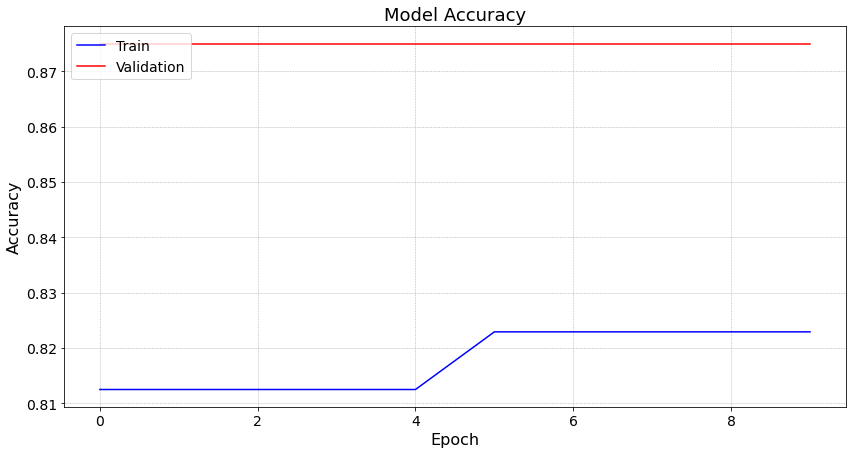

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'], color='blue', label='Train')
plt.plot(history.history['val_accuracy'], color='red', label='Validation')
plt.title('Model Accuracy', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Model Loss

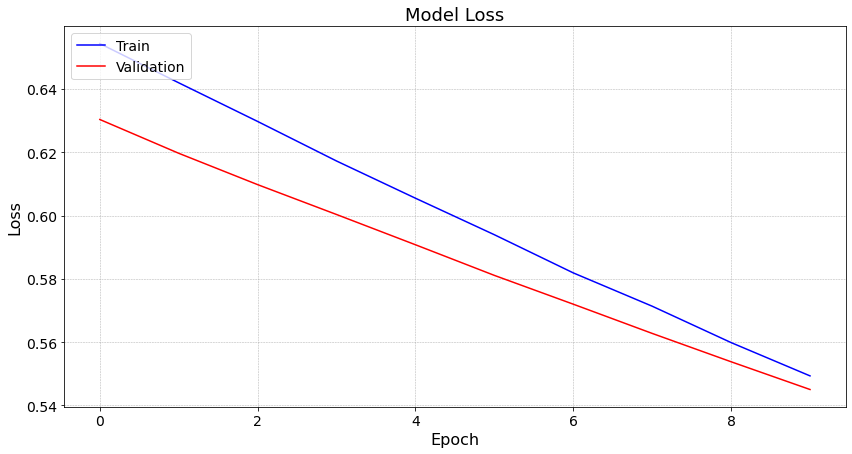

In [8]:
# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='red', label='Validation')
plt.title('Model Loss', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 8. Model Evaluation on Test Data <a id='ch8'></a>

Once our neural network model is trained, the next crucial step is to evaluate its performance on the test data. This dataset consists of samples that the model hasn't seen during training, making it an excellent benchmark to gauge the model's real-world performance.

In this section, we'll:

1. <span style="color:red">**Make Predictions**</span>: Using our trained model, we'll predict the class labels for the test set. The `predict` method returns the probabilities for each class, so we use `np.argmax` to extract the class with the highest probability as our prediction.

2. <span style="color:red">**Calculate Test Accuracy**</span>: Accuracy is a straightforward metric that quantifies the proportion of correct predictions out of the total predictions made. A higher accuracy indicates that the model's predictions align well with the actual values.

Let's proceed with the evaluation:

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test_preprocessed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_classes)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 121ms/step
Test Accuracy: 90.00%


## 9. Confusion Matrix <a id='ch9'></a>

A **Confusion Matrix** is a powerful tool to understand the performance of a classification model. It provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions for each class. This granularity allows us to pinpoint specific areas where the model might be struggling.

In the matrix:
- Rows represent the **actual classes**.
- Columns represent the **predicted classes**.

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier.

In this section, we'll:
1. <span style="color:red">**Calculate the Confusion Matrix**</span>: Using scikit-learn's `confusion_matrix` function, we'll compute the matrix for our test data predictions.
  
2. <span style="color:red">**Visualize the Matrix**</span>: We'll use Seaborn's heatmap function to visualize the confusion matrix. This visualization will help us quickly identify which classes are being confused with others.

Let's take a look at the confusion matrix for our model:

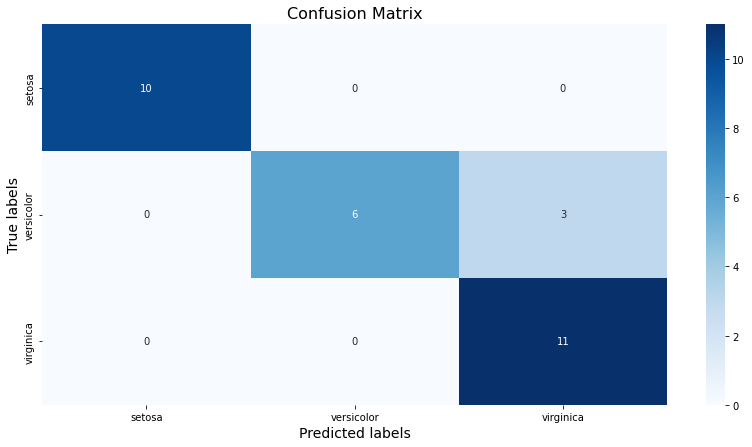

In [10]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## 10. Classification Report <a id='ch10'></a>

After training and evaluating our neural network model, it's essential to dive deeper into its performance across different classes. A **Classification Report** provides a comprehensive breakdown of the model's performance metrics for each class, including:
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to the all observations in actual class.
- **F1-Score**: The weighted average of Precision and Recall. It tries to find the balance between precision and recall.
- **Support**: The number of actual occurrences of the class in the specified dataset.

These metrics provide a more granular understanding of where the model excels and where it might be lacking. For instance, a high precision indicates that false positives are low, while a high recall indicates that false negatives are low.

In this section, we'll:
1. <span style="color:red">**Generate the Classification Report**</span>: Using scikit-learn's `classification_report` function, we'll compute these metrics for our test data predictions.
  
2. <span style="color:red">**Visualize the Report**</span>: To make the report more readable, we'll convert it into a pandas DataFrame and display it with enhanced formatting.

Let's take a detailed look at the classification report for our model:

In [12]:
# Set the display option for floating point numbers
pd.options.display.float_format = "{:,.2f}".format

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=iris.target_names, output_dict=True)

# Convert the report dictionary to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a custom CSS style for larger font sizes
style = """
<style>
    table {
        font-size: 24px;  
    }
    th {
        font-size: 18px; 
    }
</style>
"""

# Display the custom style
display(HTML(style))

# Display the report using Markdown
display(Markdown("### Classification Report"))
display(report_df)

### Classification Report

,precision,recall,f1-score,support
setosa,1.00,1.00,1.00,10.00
versicolor,1.00,0.67,0.80,9.00
virginica,0.79,1.00,0.88,11.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.93,0.89,0.89,30.00
weighted avg,0.92,0.90,0.90,30.00


## 11. Conclusion<a id='ch11'></a>

Throughout this analysis, we embarked on a journey to understand the intricacies of the Iris dataset, exploring the relationships between sepal and petal measurements and the species of iris flowers. Our exploration began with building a neural network model, which provided a foundational understanding of the data's structure and the potential predictors.

The neural network model, focusing on the four features of the dataset, achieved an impressive accuracy of 90%. This indicates that the model was able to correctly classify 90% of the iris flowers into their respective species based on their sepal and petal measurements.

As we delved deeper into the model's performance, we visualized the training process, observing how the model's accuracy and loss evolved over epochs. This visualization provided insights into the model's learning trajectory, highlighting its ability to learn and adapt to the training data.

Furthermore, the **confusion matrix** and **classification report** offered a detailed breakdown of the model's performance on each class. The model showcased exceptional prowess in classifying the 'setosa' species, achieving a precision, recall, and f1-score of 1.00. While the model faced some challenges with the 'versicolor' and 'virginica' species, it still achieved commendable results.

In conclusion, the sepal and petal measurements play a pivotal role in determining the species of iris flowers. The neural network model's performance underscores the power of deep learning in handling classification tasks, even with a relatively small dataset like the Iris dataset. The progression from data preprocessing to model evaluation emphasizes the importance of each step in the machine learning pipeline and the potential of neural networks in making accurate classifications.

### Potential Improvements

While our neural network model achieved commendable accuracy on the Iris dataset, there's always room for improvement. Here are some potential avenues to explore for enhancing the model's performance:

1. **Hyperparameter Tuning**: We used a basic neural network architecture with a specific set of hyperparameters. Exploring different architectures, activation functions, optimizers, and learning rates could lead to better results. Techniques like grid search or random search can be employed to systematically find the best hyperparameters.

2. **Data Augmentation**: Although the Iris dataset is relatively small and well-balanced, data augmentation techniques can be explored. For tabular data like the Iris dataset, techniques such as SMOTE or ADASYN can be used to generate synthetic samples, potentially improving the model's robustness.

3. **Regularization**: To prevent overfitting, especially when using deeper neural networks, regularization techniques like dropout or L1/L2 regularization can be incorporated into the model.

4. **Ensemble Methods**: Combining predictions from multiple models can often lead to better results. Techniques like bagging or boosting can be explored to see if they enhance the classification accuracy.

5. **Feature Engineering**: While the Iris dataset is relatively straightforward, there might be potential in creating new features or transforming existing ones to better capture the underlying patterns in the data.

6. **Alternative Models**: While neural networks are powerful, sometimes simpler models or other machine learning algorithms like Random Forests, Gradient Boosting Machines, or Support Vector Machines might yield better or comparable results. It's always worth exploring a range of models to find the best fit for the data.

7. **Evaluation Metrics**: While accuracy is a straightforward metric, it might not always capture the nuances of the model's performance, especially if the dataset were imbalanced. Exploring other metrics like the F1-score, ROC-AUC, or precision-recall curves could provide a more comprehensive view of the model's capabilities.

By exploring these avenues, we can potentially enhance the model's performance, making it even more robust and accurate in classifying iris flowers.